In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pyvtools.text as vtext

import pyvdirs.dirs as dirs
import sys
sys.path.insert(0, dirs.SYSTEM_HOME)
sys.path.insert(0, os.path.join(dirs.SYSTEM_HOME, "ToyExample"))
from socket import gethostname

from ToyExample.toy_example import extract_results_from_log, plot_loss

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Parameters

In [2]:
log_path = os.path.join(dirs.MODELS_HOME, "ToyExample", "14_OuterDist", "log_InvertedGuideACID.txt")
log_path_2 = os.path.join(dirs.MODELS_HOME, "ToyExample", "14_OuterDist", "log_NoACIDGuided.txt")
# log_path = os.path.join(dirs.MODELS_HOME, "ToyExample", "log_test.txt")

## Extract loss

In [6]:
results = extract_results_from_log(log_path)

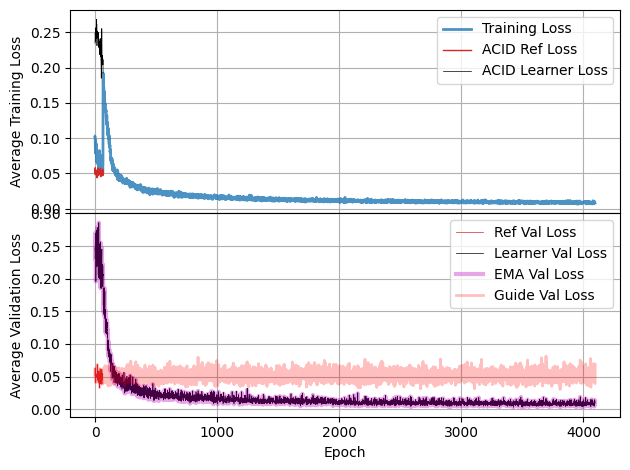

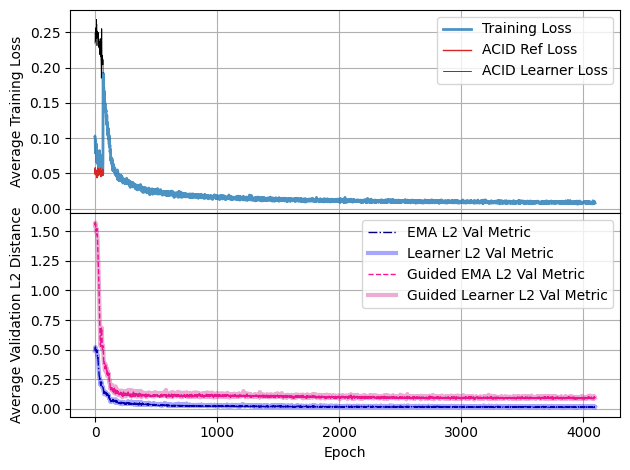

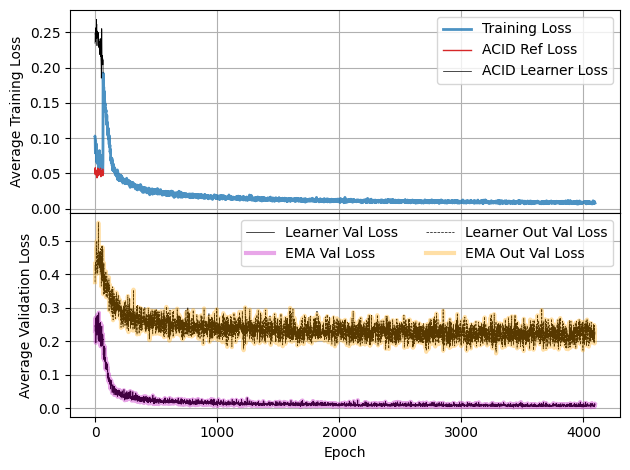

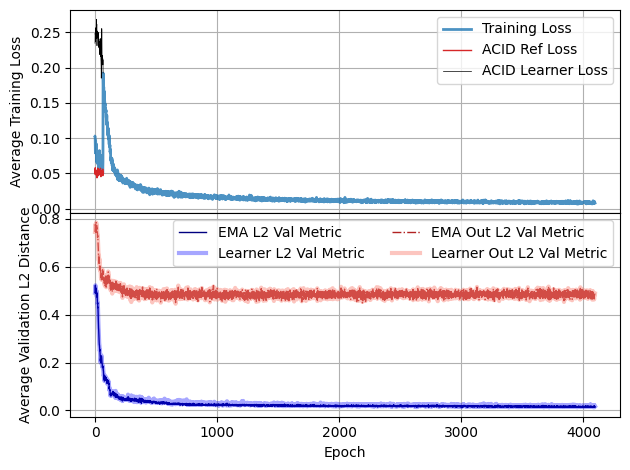

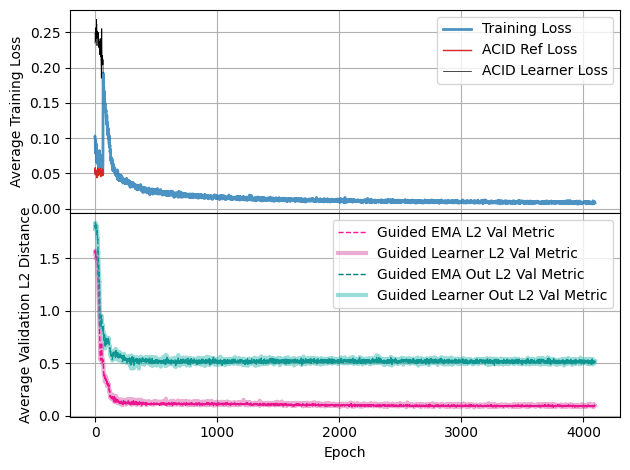

In [27]:
fig_path = log_path.replace(".txt",".png").replace("log", "plot")

figs = plot_loss(results, fig_path=fig_path)

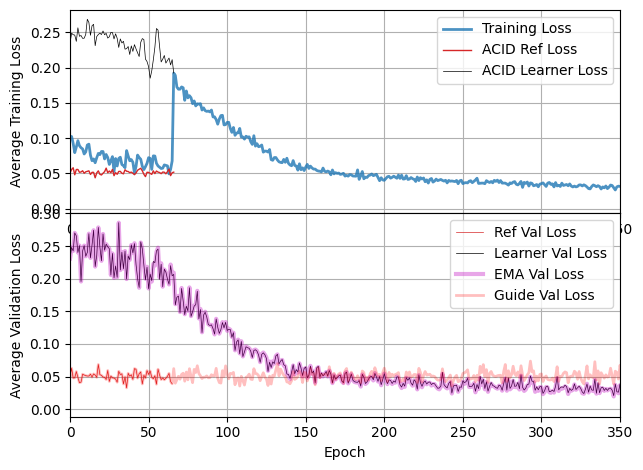

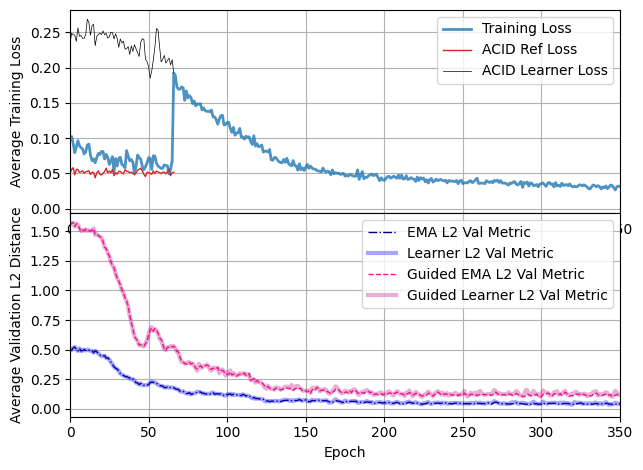

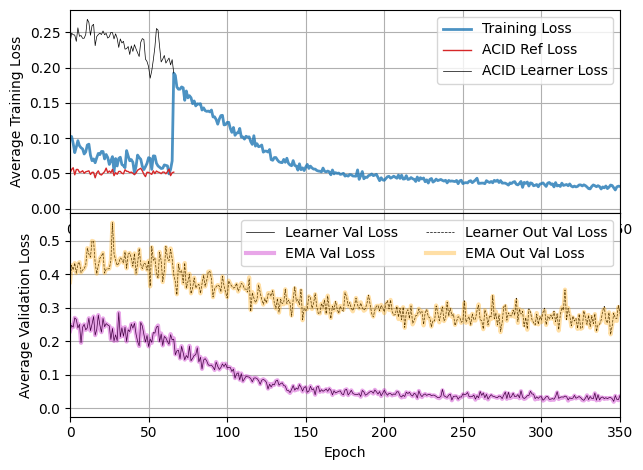

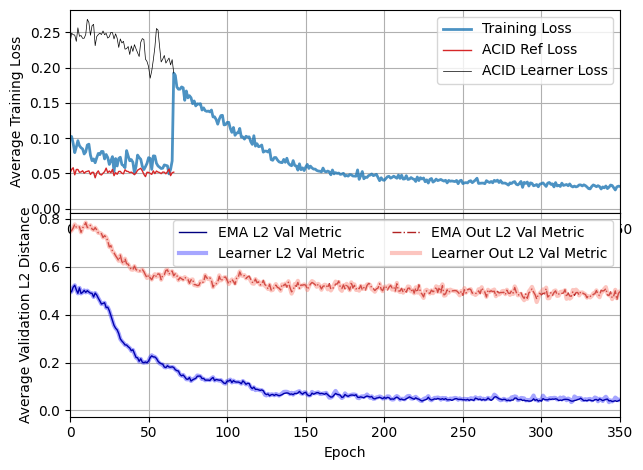

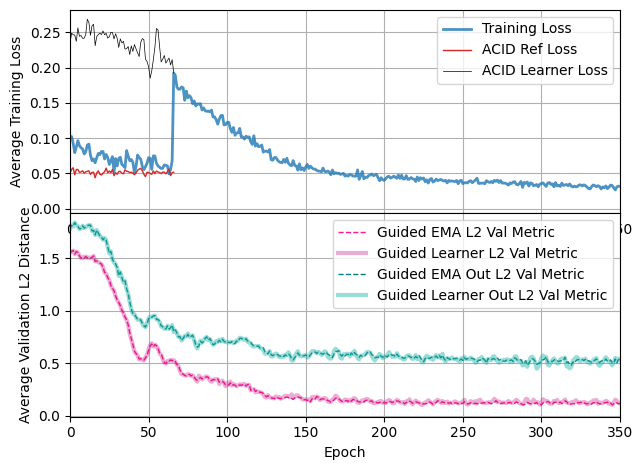

In [26]:
fig_path = log_path.replace(".txt",".png").replace("log", "plot")

figs = plot_loss(results, fig_path=fig_path)

fig_path = fig_path.replace("plot", "zoom")

fig_path_base, fig_extension = os.path.splitext(fig_path)

for i, fig in enumerate(figs):
    axes = fig.axes
    for ax in axes:
        ax.set_xlim([0,350])
    fig.savefig(fig_path_base+"_"+str(i+1)+fig_extension)

In [29]:
results_2 = extract_results_from_log(log_path_2)

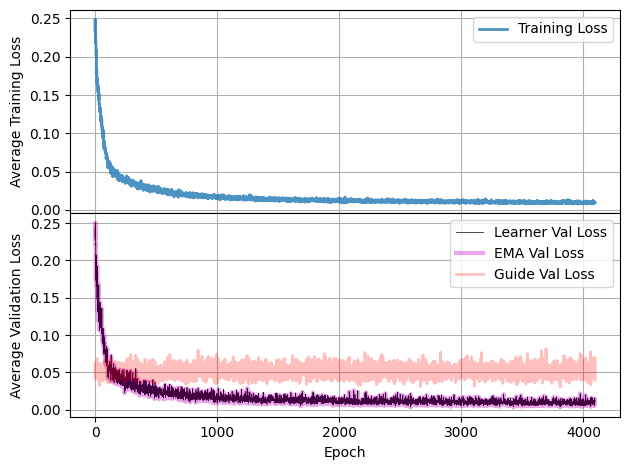

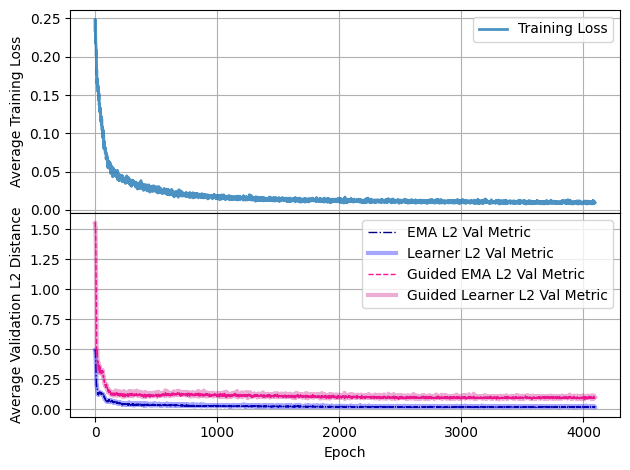

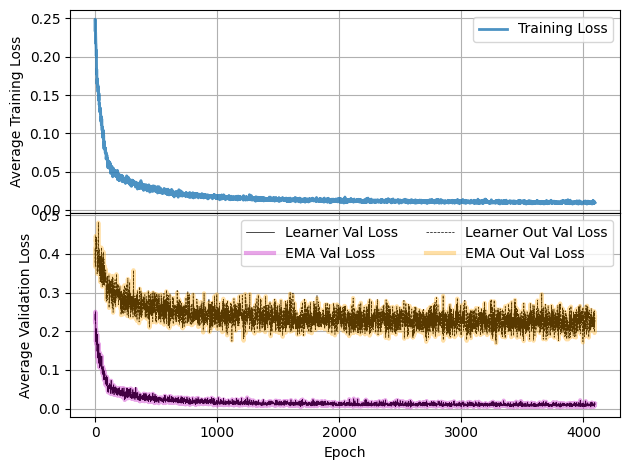

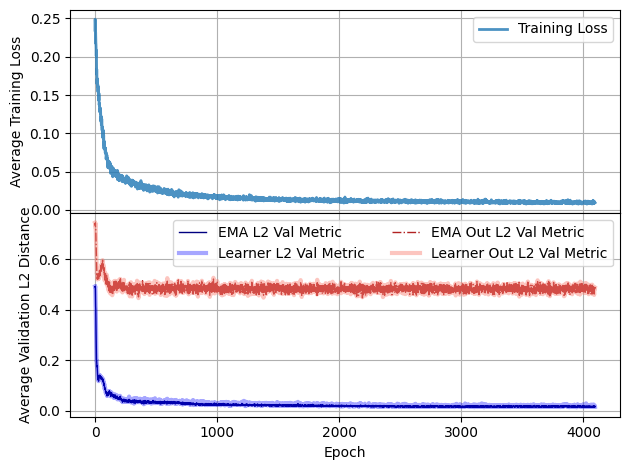

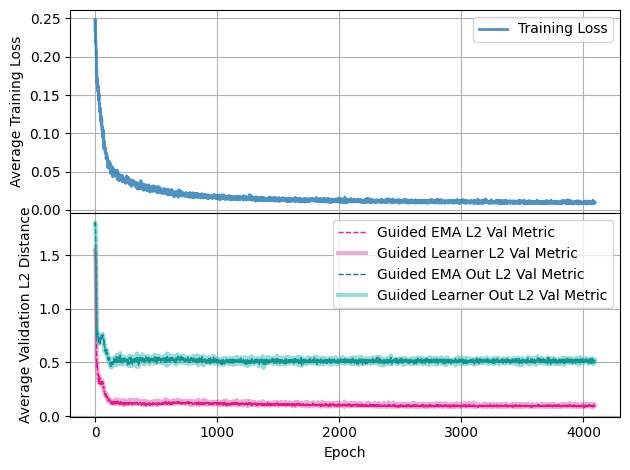

In [30]:
fig_path = log_path_2.replace(".txt",".png").replace("log", "plot")

figs = plot_loss(results_2, fig_path=fig_path)

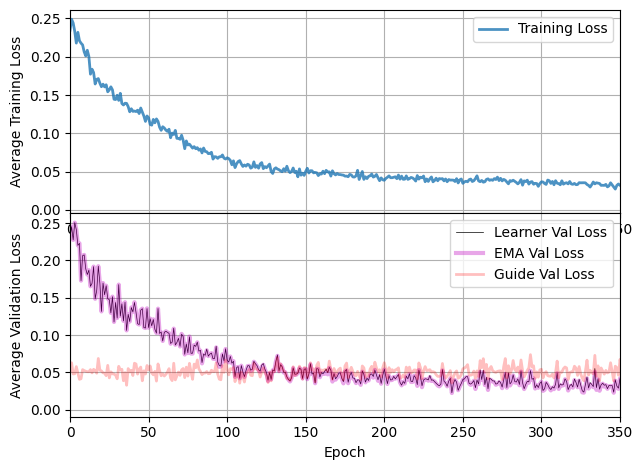

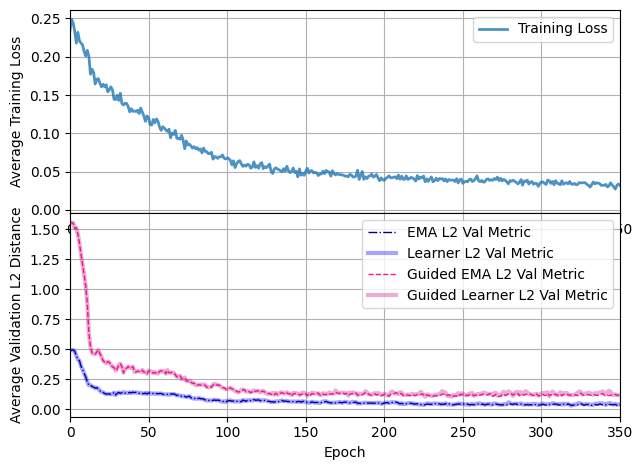

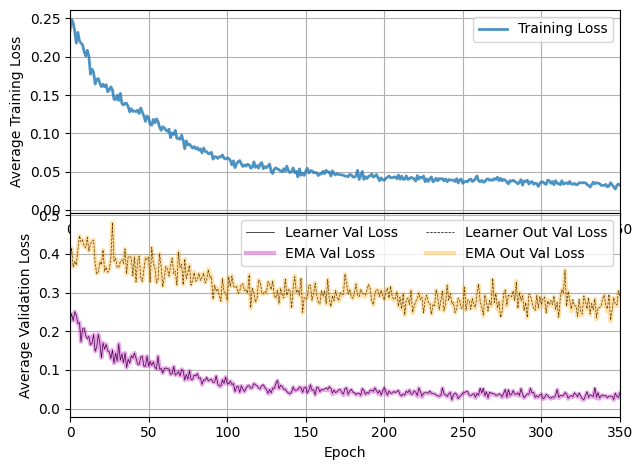

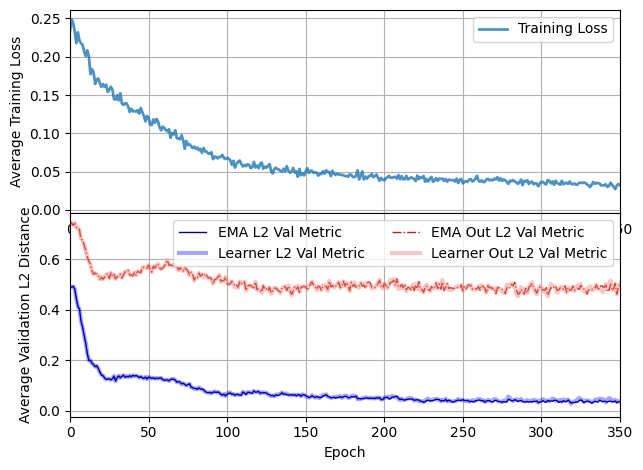

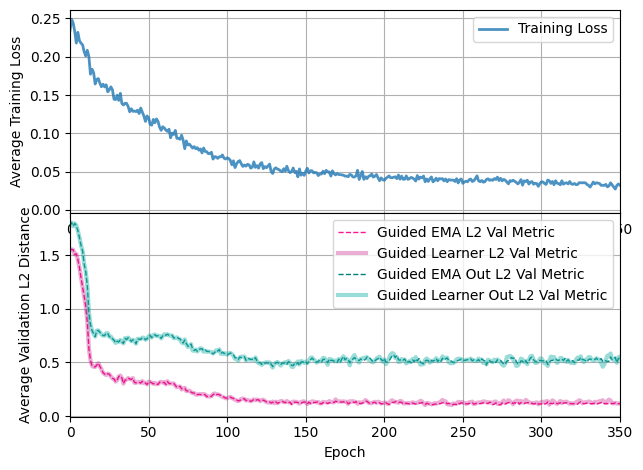

In [31]:
fig_path = log_path_2.replace(".txt",".png").replace("log", "plot")

figs = plot_loss(results_2, fig_path=fig_path)

fig_path = fig_path.replace("plot", "zoom")

fig_path_base, fig_extension = os.path.splitext(fig_path)

for i, fig in enumerate(figs):
    axes = fig.axes
    for ax in axes:
        ax.set_xlim([0,350])
    fig.savefig(fig_path_base+"_"+str(i+1)+fig_extension)

## Compare Two

### Automatically

In [ ]:
def compare_loss(log_path, plotting=True):
    
    if "No_ACID" in log_path:
        acid_first = False
        log_path_2 = log_path.replace("No_ACID", "ACID")
        labels = ["No ACID", "ACID"]
    else:
        acid_first = True
        log_path_2 = log_path.replace("ACID", "No_ACID")
        labels = ["ACID", "No ACID"]
    
    results = extract_results_from_log(log_path, plotting=False)
    results_2 = extract_results_from_log(log_path_2, plotting=False)

    train_loss_colors = ["C0", "mediumblue"]
    ref_loss_colors = ["C3", "lightcoral"]
    val_loss_colors = ["k", "grey"]
    val_linestyle = [":", "-"]
    linewidth = [2, 0.5]
    zorder = [100, 0]
    if not acid_first: 
        train_loss_colors = train_loss_colors[::-1]
        val_loss_colors = val_loss_colors[::-1]
        val_linestyle = val_linestyle[::-1]
        linewidth = linewidth[::-1]
        zorder = zorder[::-1]

    if plotting:
        plt.figure()
        plt.plot(results["ref_loss"], color=ref_loss_colors[0], label=labels[0]+" Ref Training", alpha=0.8, zorder=zorder[0], linewidth=linewidth[0])
        plt.plot(results_2["ref_loss"], color=ref_loss_colors[1], label=labels[1]+" Ref Training", alpha=0.8, zorder=zorder[1], linewidth=linewidth[1])
        plt.plot(results["mini_learner_loss"], color=train_loss_colors[0], label=labels[0]+" Training", alpha=0.8, linewidth=linewidth[0])
        plt.plot(results_2["mini_learner_loss"], color=train_loss_colors[1], label=labels[1]+" Training", alpha=0.8, linewidth=linewidth[1])
        if len(results["ref_val_loss"])>0: 
            plt.plot(results["learner_val_loss"], color=val_loss_colors[0], linestyle=val_linestyle[0], label=labels[0]+" Validation", alpha=1, linewidth=1, zorder=zorder[0])
            plt.plot(results["learner_val_loss"], color=val_loss_colors[1], linestyle=val_linestyle[1], label=labels[1]+" Validation", alpha=1, linewidth=1, zorder=zorder[1])
        plt.xlabel("Epoch")
        plt.ylabel("Average Loss")
        plt.grid()
        plt.legend()
        plt.tight_layout()

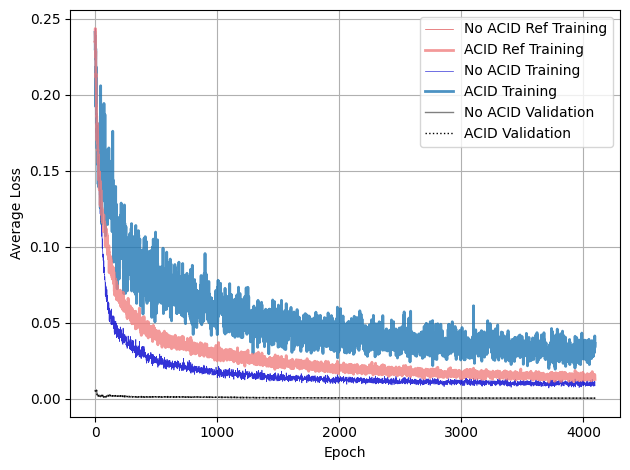

In [ ]:
compare_loss(log_path)

### Manually

In [8]:
results = extract_results_from_log(log_path)
results_2 = extract_results_from_log(log_path_2)

In [9]:
super_learner_loss = results["super_learner_loss"]
super_ref_loss = results["super_ref_loss"]
learner_loss = results["learner_loss"]
learner_val_loss = results["learner_val_loss"]
ema_val_loss = results["ema_val_loss"]
guide_val_loss = results["guide_val_loss"]
ref_val_loss = results["ref_val_loss"]
ema_L2_val_metric = results["ema_L2_val_metric"]
ema_guided_L2_val_metric = results["ema_guided_L2_val_metric"]
L2_val_metric = results["L2_val_metric"]
guided_L2_val_metric = results["guided_L2_val_metric"]

super_learner_loss_2 = results_2["super_learner_loss"]
super_ref_loss_2 = results_2["super_ref_loss"]
learner_loss_2 = results_2["learner_loss"]
learner_val_loss_2 = results_2["learner_val_loss"]
ema_val_loss_2 = results_2["ema_val_loss"]
guide_val_loss_2 = results_2["guide_val_loss"]
ref_val_loss_2 = results_2["ref_val_loss"]
ema_L2_val_metric_2 = results_2["ema_L2_val_metric"]
ema_guided_L2_val_metric_2 = results_2["ema_guided_L2_val_metric"]
L2_val_metric_2 = results_2["L2_val_metric"]
guided_L2_val_metric_2 = results_2["guided_L2_val_metric"]

In [10]:
fig_path = log_path.replace(".txt",".png").replace("log","compared")
zoom_fig_path = fig_path.replace("compared","zoom_compared")

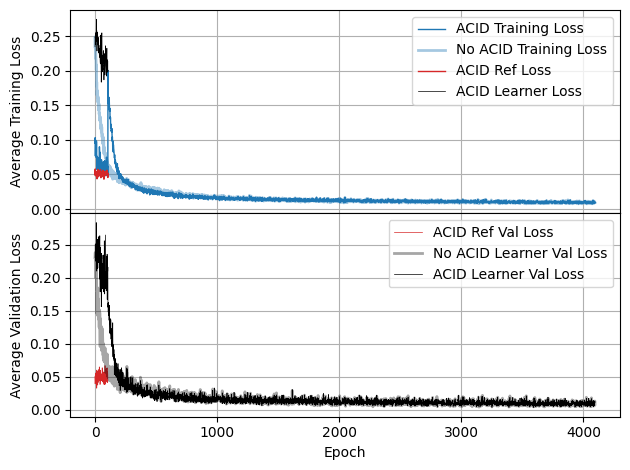

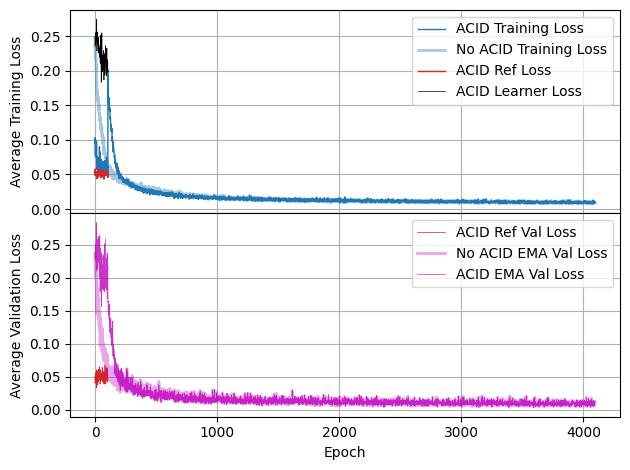

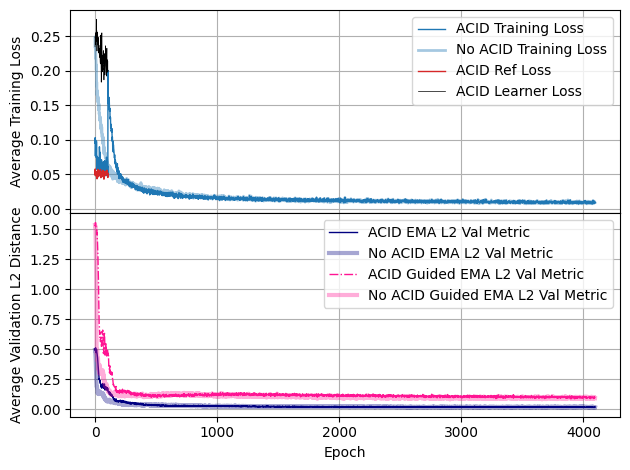

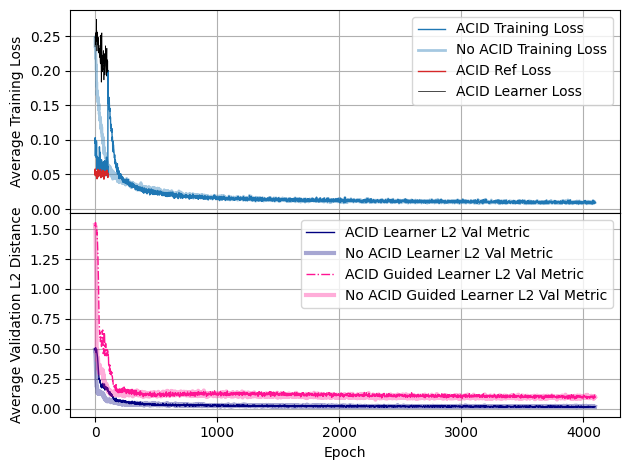

In [12]:
zoom_in = False
max_iter = 350

# Basic plot
def plot_training_loss():
    fig, axes = plt.subplots(nrows=2, gridspec_kw=dict(hspace=0))
    axes[0].plot(results["learner_loss"], "C0", label="ACID Training Loss", alpha=1, linewidth=1)
    axes[0].plot(results_2["learner_loss"], "C0", label="No ACID Training Loss", alpha=0.4, linewidth=2)
    if len(results["super_ref_loss"])>0: 
        axes[0].plot(results["super_ref_loss"], "C3", label="ACID Ref Loss", alpha=1, linewidth=1)
        axes[0].plot(results["super_learner_loss"], "k", label="ACID Learner Loss", alpha=1, linewidth=0.5)
    axes[1].set_xlabel("Epoch")
    axes[0].set_ylabel("Average Training Loss")
    axes[0].legend()
    for ax in axes: ax.grid()
    return fig, axes

# First, plot validation loss values
fig_0, axes_0 = plot_training_loss()
if len(learner_val_loss)>0:
    if len(ref_val_loss)>0:
        axes_0[1].plot(ref_val_loss, "C3", label="ACID Ref Val Loss", alpha=1, linewidth=0.5)
    axes_0[1].plot(learner_val_loss_2, "k", label="No ACID Learner Val Loss", alpha=0.35, linewidth=2)
    axes_0[1].plot(learner_val_loss, "k", label="ACID Learner Val Loss", alpha=1.0, linewidth=0.5)
axes_0[1].set_ylabel("Average Validation Loss")
axes_0[1].legend()
plt.tight_layout()
if zoom_in:
    for ax in axes_0: ax.set_xlim([0,max_iter])

# Also plot EMA validation loss values
fig_1, axes_1 = plot_training_loss()
if len(learner_val_loss)>0:
    if len(ref_val_loss)>0:
        axes_1[1].plot(ref_val_loss, "C3", label="ACID Ref Val Loss", alpha=1, linewidth=0.5)
    axes_1[1].plot(ema_val_loss_2, color="m", label="No ACID EMA Val Loss", alpha=0.35, linewidth=2)
    axes_1[1].plot(ema_val_loss, color="m", label="ACID EMA Val Loss", alpha=0.8, linewidth=0.5)
axes_1[1].set_ylabel("Average Validation Loss")
axes_1[1].legend()
plt.tight_layout()
if zoom_in:
    for ax in axes_1: ax.set_xlim([0,max_iter])
    
# Then, plot EMA validation loss values
fig_2, axes_2 = plot_training_loss()
if len(learner_val_loss)>0:
    axes_2[1].plot(results["ema_L2_val_metric"], "-", color="navy", 
                  label="ACID EMA L2 Val Metric", alpha=1, linewidth=1)
    axes_2[1].plot(results_2["ema_L2_val_metric"], "-", color="navy", 
                    label="No ACID EMA L2 Val Metric", alpha=0.35, linewidth=3)
    if len(results["ema_guided_L2_val_metric"])>0:
        axes_2[1].plot(results["ema_guided_L2_val_metric"], "-.", color="deeppink", 
                     label="ACID Guided EMA L2 Val Metric", alpha=1, linewidth=1)
        axes_2[1].plot(results_2["ema_guided_L2_val_metric"], "-", color="deeppink", 
                     label="No ACID Guided EMA L2 Val Metric", alpha=0.35, linewidth=3)
        axes_2[1].set_ylabel("Average Validation L2 Distance")
axes_2[1].legend()
plt.tight_layout()
if zoom_in:
    for ax in axes_2: ax.set_xlim([0,max_iter])

# Also plot EMA validation loss values
fig_3, axes_3 = plot_training_loss()
if len(learner_val_loss)>0:
    axes_3[1].plot(results["L2_val_metric"], "-", color="navy", 
                  label="ACID Learner L2 Val Metric", alpha=1, linewidth=1)
    axes_3[1].plot(results_2["L2_val_metric"], "-", color="navy", 
                    label="No ACID Learner L2 Val Metric", alpha=0.35, linewidth=3)
    if len(results["guided_L2_val_metric"])>0:
        axes_3[1].plot(results["guided_L2_val_metric"], "-.", color="deeppink", 
                     label="ACID Guided Learner L2 Val Metric", alpha=1, linewidth=1)
        axes_3[1].plot(results_2["guided_L2_val_metric"], "-", color="deeppink", 
                     label="No ACID Guided Learner L2 Val Metric", alpha=0.35, linewidth=3)
        axes_3[1].set_ylabel("Average Validation L2 Distance")
axes_3[1].legend()
plt.tight_layout()
if zoom_in:
    for ax in axes_3: ax.set_xlim([0,max_iter])

In [95]:
fig_path = os.path.join(dirs.MODELS_HOME, "ToyExample", "08_GuideAsACIDRef", 
                        "compared_inverted_guide_acid_and_deactivate.png")
plt.savefig(fig_path)

<Figure size 640x480 with 0 Axes>

## Compare many

### Parameters

In [2]:
# series = ["18_Statistics", "19_ACIDParams", "21_Repetitions", "23_NormalizedLogits"]
series = ["23_NormalizedLogits"]

### Auxiliary definitions

In [9]:
get_path = lambda series : os.path.join(dirs.MODELS_HOME, "ToyExample", series)

host_id = gethostname()
other_hosts = vtext.filter_by_string_must(list(dirs.check_directories_file().keys()), [host_id,"else"], must=False)

series_folders = {}
for s in series:
    series_path = get_path(s)
    contents = os.listdir(series_path)
    folders = [c for c in contents if os.path.isdir(os.path.join(series_path, c))]
    folders = vtext.filter_by_string_must(folders, ["Failed", "Old"], must=False)
    series_folders[s] = folders

### Load data

In [107]:
loss_results = {}
val_results = {}
other_results = {}

for s in series:

    series_path = get_path(s)
    log_files = ["log_"+f+".txt" for f in series_folders[s]]
    assert all([os.path.isfile(os.path.join(series_path, f)) for f in log_files]), "Some logs have not been found"

    loss_results[s] = {}
    val_results[s] = {}
    other_results[s] = {}
    for f, log_file in zip(series_folders[s], log_files):

        log_filepath = os.path.join(series_path, log_file)

        these_results = extract_results_from_log(log_filepath)

        loss_results[s][f] = {}
        val_results[s][f] = {}
        other_results[s][f] = {}
        for key, value in these_results.items():
            if "val" in key:
                val_results[s][f][key] = value
            elif "loss" in key and "test" not in key:
                loss_results[s][f][key] = value
            else:
                other_results[s][f][key] = value

In [108]:
loss_results

{'23_NormalizedLogits': {'NoACID': {'super_learner_loss': [],
   'super_ref_loss': [],
   'learner_loss': [0.2412182092666626,
    0.23876473307609558,
    0.2338685393333435,
    0.23583634197711945,
    0.23043879866600037,
    0.21849803626537323,
    0.21701392531394958,
    0.20787465572357178,
    0.19891142845153809,
    0.19695819914340973,
    0.19001838564872742,
    0.18559125065803528,
    0.18566399812698364,
    0.19292911887168884,
    0.175217866897583,
    0.18421882390975952,
    0.17558573186397552,
    0.17883530259132385,
    0.1732369065284729,
    0.16965016722679138,
    0.1729646474123001,
    0.17534099519252777,
    0.17742696404457092,
    0.1679844856262207,
    0.16305209696292877,
    0.1718684285879135,
    0.16189613938331604,
    0.16942647099494934,
    0.16018186509609222,
    0.15421637892723083,
    0.16950954496860504,
    0.16332054138183594,
    0.16442149877548218,
    0.15779200196266174,
    0.16850562393665314,
    0.17072077095508575,
    0

### Get keys and fill gaps

In [109]:
loss_keys = set()
for s in series:
    for f in loss_results[s].keys():
        loss_keys.update( list(loss_results[s][f].keys()) )

In [110]:
for key in loss_keys:
    for s in series:
        for f, vals in loss_results[s].items():
            if key not in vals.keys():
                loss_results[s][f][key] = None

In [111]:
loss_keys

{'learner_loss', 'super_learner_loss', 'super_ref_loss'}

In [113]:
loss_names = {
    "learner_loss":"Learner's Average Loss",
    "super_learner_loss":"Learner's Super-Batch Average Loss",
    "super_ref_loss":"Reference's Super-Batch Average Loss"
}
assert all([key in loss_names.keys() for key in loss_keys]), "Missing key"

In [116]:
loss_keys = list(loss_names.keys())
sorted_results = {key: {s: {f: loss_results[s][f][key] for f in series_folders[s]} for s in series} for key in loss_keys}

In [94]:
val_keys = set()
for s in series:
    for f in val_results[s].keys():
        val_keys.update( list(val_results[s][f].keys()) )

In [95]:
for key in val_keys:
    for s in series:
        for f, vals in val_results[s].items():
            if key not in vals.keys():
                val_results[s][f][key] = None

In [96]:
val_keys

{'L2_val_metric',
 'ema_L2_val_metric',
 'ema_guided_L2_val_metric',
 'ema_guided_out_L2_val_metric',
 'ema_out_L2_val_metric',
 'ema_out_val_loss',
 'ema_val_loss',
 'guide_out_val_loss',
 'guide_val_loss',
 'guided_L2_val_metric',
 'guided_out_L2_val_metric',
 'learner_out_val_loss',
 'learner_val_loss',
 'out_L2_val_metric',
 'ref_out_val_loss',
 'ref_val_loss'}

In [97]:
val_names = {
    "ema_val_loss":"EMA's Validation Average Loss",
    "ema_out_val_loss":"EMA's Validation Outer Average Loss",
    "learner_val_loss":"Learner's Validation Average Loss",
    "learner_out_val_loss":"Learner's Validation Outer Average Loss",
    "ref_val_loss":"Reference's Validation Average Loss",
    "ref_out_val_loss":"Reference's Validation Outer Average Loss",
    "guide_val_loss":"Guide's Validation Average Loss",
    "guide_out_val_loss":"Guide's Validation Outer Average Loss",
    "ema_L2_val_metric":"EMA's Validation Average L2 Distance",
    "ema_out_L2_val_metric":"EMA's Validation Outer Average L2 Distance",
    "L2_val_metric":"Learner's Validation Average L2 Distance",
    "out_L2_val_metric":"Learner's Validation Outer Average L2 Distance",
    "ema_guided_L2_val_metric":"Guided EMA's Validation Average L2 Distance",
    "ema_guided_out_L2_val_metric":"Guided EMA's Validation Outer Average L2 Distance",
    "guided_L2_val_metric":"Guided Learner's Validation Average L2 Distance",
    "guided_out_L2_val_metric":"Guided Learner's Validation Outer Average L2 Distance",
    # "ema_mandala_score":"EMA's Validation Mandala Score",
    # "learner_mandala_score":"Learner's Validation Mandala Score",
    # "ema_guided_mandala_score":"Guided EMA's Validation Mandala Score",
    # "learner_guided_mandala_score":"Guided Learner's Validation Mandala Score",
    # "ema_classification_score":"EMA's Validation Classification Score",
    # "learner_classification_score":"Learner's Validation Classification Score",
    # "ema_guided_classification_score":"Guided EMA's Validation Classification Score",
    # "learner_guided_classification_score":"Guided Learner's Validation Classification Score",
}
assert all([key in val_names.keys() for key in val_keys]), "Missing key"

In [98]:
val_keys = list(val_names.keys())
sorted_results = {key: {s: {f: val_results[s][f][key] for f in series_folders[s]} for s in series} for key in val_keys}

### Analyze results

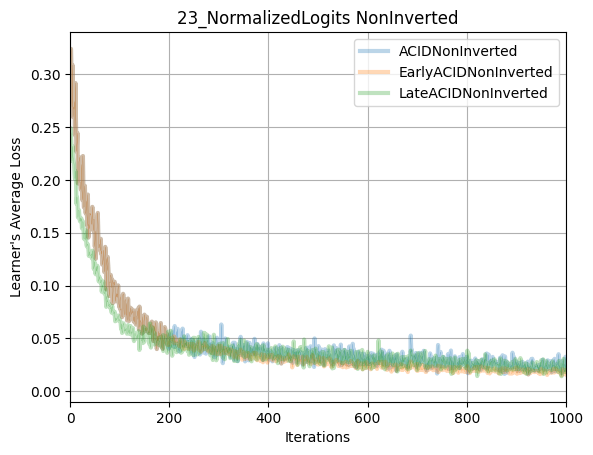

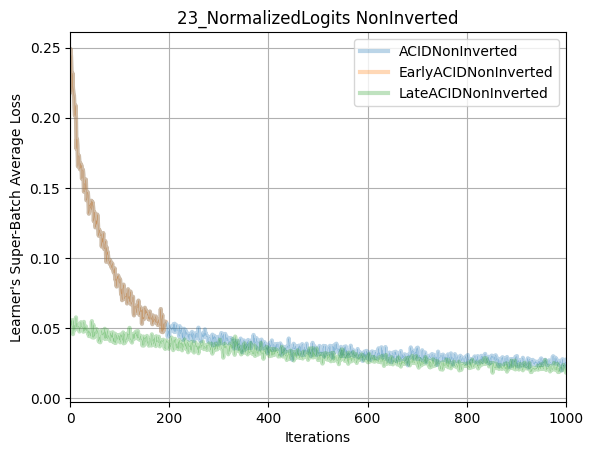

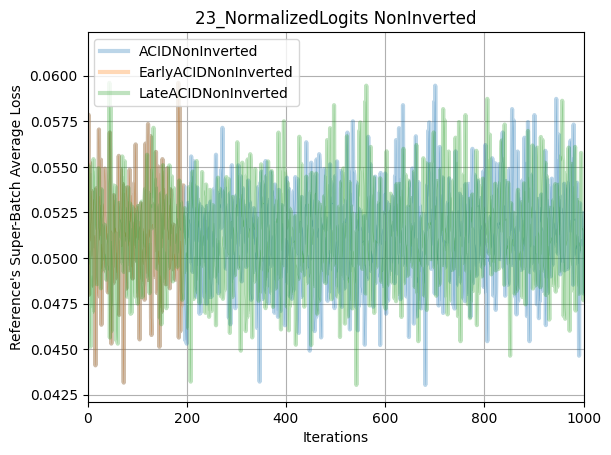

In [127]:
keep = lambda f : "Interpol" not in f and "NonInverted" in f
add_title = " NonInverted"

colors = [f"C{i}" for i in range(10)]

for s in series:
    for key in loss_keys:
        if any([len(loss_results[s][f][key])>0 for f in series_folders[s] if keep(f)]):
            plt.figure()
            plt.title(s + add_title)
            i = 0
            for f in series_folders[s]:
                if len(loss_results[s][f][key])>0 and keep(f):
                    plt.plot(loss_results[s][f][key], label=f, alpha=.3, linewidth=3, color=colors[i])
                    plt.plot(loss_results[s][f][key], alpha=1, linewidth=0.1, color=colors[i])
                    i += 1
            plt.xlabel("Iterations")
            plt.ylabel(loss_names[key])
            plt.legend()
            plt.grid()
            plt.xlim(0,1000)

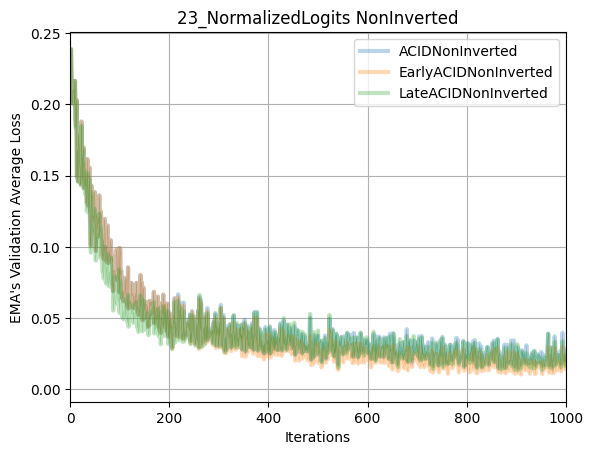

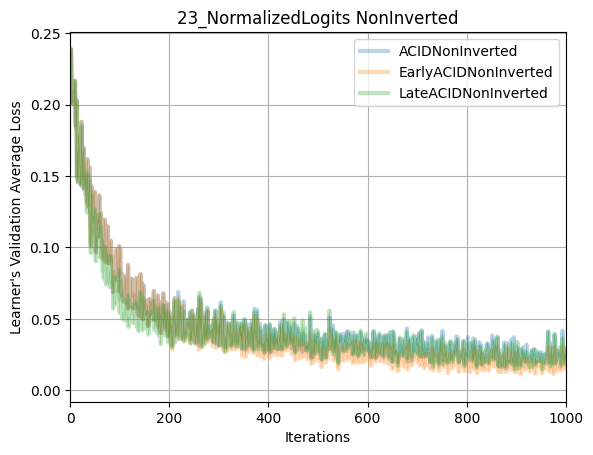

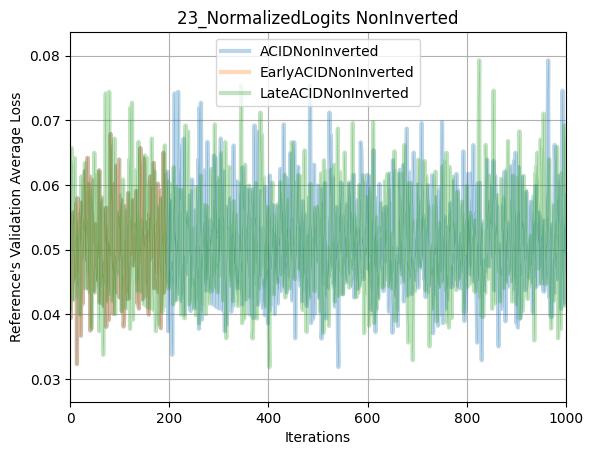

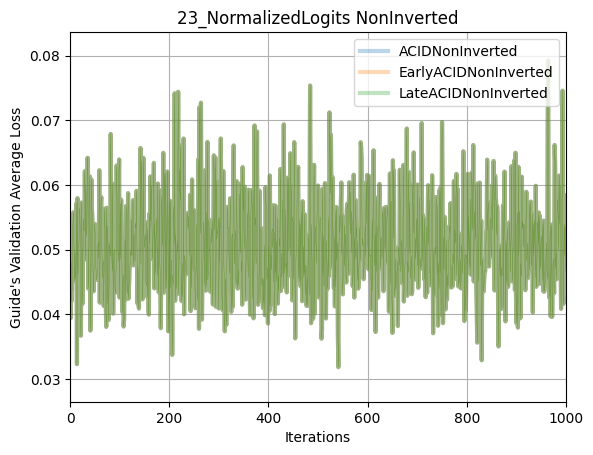

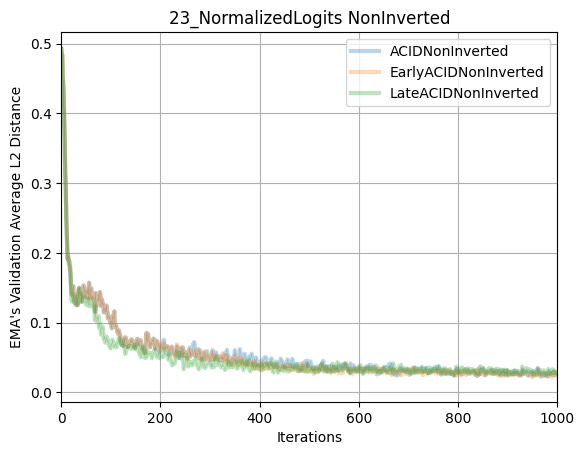

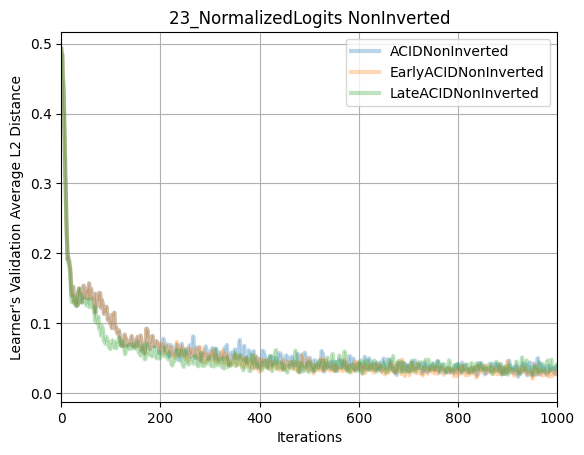

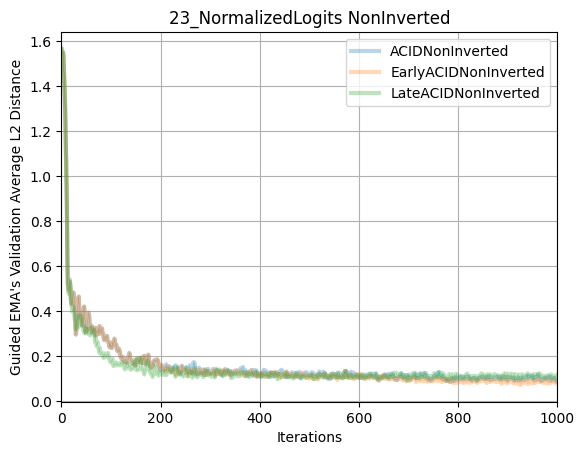

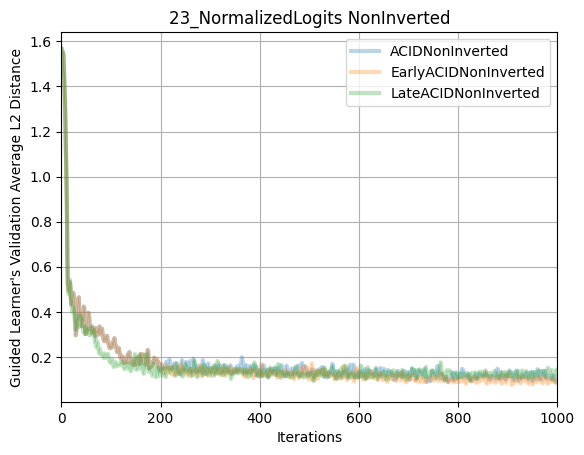

In [99]:
keep = lambda f : "Interpol" not in f and "NonInverted" in f
add_title = " NonInverted"

colors = [f"C{i}" for i in range(10)]

for s in series:
    for key in val_keys:
        if any([len(val_results[s][f][key])>0 for f in series_folders[s] if keep(f)]):
            plt.figure()
            plt.title(s + add_title)
            i = 0
            for f in series_folders[s]:
                if len(val_results[s][f][key])>0 and keep(f):
                    plt.plot(val_results[s][f][key], label=f, alpha=.3, linewidth=3, color=colors[i])
                    plt.plot(val_results[s][f][key], alpha=1, linewidth=0.1, color=colors[i])
                    i += 1
            plt.xlabel("Iterations")
            plt.ylabel(val_names[key])
            plt.legend()
            plt.grid()
            plt.xlim(0,1000)

In [ ]:
total_iters = 4096
acid_trigger = {}
for s in series:
    acid_trigger[s] = {}
    for f in series_folders[s]:
        if "Early" in f or "Late" in f:
            try:
                acid_trigger[s][f] = [learner < ref for learner, ref in zip(
                    loss_results[s][f]["super_learner_loss"],
                    loss_results[s][f]["super_ref_loss"])].index(True)
            except ValueError: # True not in list
                if len(loss_results[s][f]["super_learner_loss"]) < len(loss_results[s][f]["learner_loss"]):
                    acid_trigger[s][f] = len(loss_results[s][f]["super_learner_loss"])
                else:
                    acid_trigger[s][f] = None
        elif "NoACID" in f:
            acid_trigger[s][f] = total_iters - 1
        else:
            acid_trigger[s][f] = 0

In [142]:
acid_trigger

{'23_NormalizedLogits': {'NoACID': 4096,
  'ACID': 0,
  'ACIDNonInverted': 0,
  'EarlyACID': 194,
  'EarlyACIDNonInverted': 193,
  'EarlyInterpolACID': 203,
  'EarlyInterpolACIDNonInverted': 198,
  'InterpolACID': 0,
  'InterpolACIDNonInverted': 0,
  'LateACID': 0,
  'LateACIDNonInverted': 0,
  'LateInterpolACID': 202,
  'LateInterpolACIDNonInverted': 311}}

In [156]:
acid_speed = 1.5 # It/s
no_acid_speed = 3.7 # It/s

In [ ]:
total_iters = 4096
time_results = {} # sec
total_time_results = {} # min
for s in series:
    time_results[s] = {}
    total_time_results[s] = {}
    for f in series_folders[s]:
        speed = np.ones(total_iters) * no_acid_speed
        if "Late" in f:
            print(f)
            speed[acid_trigger[s][f]:] = acid_speed
        elif "ACID" in f and "NoACID" not in f:
            speed[:acid_trigger[s][f]] = acid_speed
        print(f, speed[0], speed[-1])
        # elif "ACID" in f:
        #     speed = np.ones(total_iters) * acid_speed
        time_results[s][f] = np.arange(1,total_iters+1) / speed
        total_time_results[s][f] = max(time_results[s][f]) / 60

NoACID 3.7 3.7
ACID 3.7 3.7
ACIDNonInverted 3.7 3.7
EarlyACID 1.5 3.7
EarlyACIDNonInverted 1.5 3.7
EarlyInterpolACID 1.5 3.7
EarlyInterpolACIDNonInverted 1.5 3.7
InterpolACID 3.7 3.7
InterpolACIDNonInverted 3.7 3.7
LateACID
LateACID 1.5 1.5
LateACIDNonInverted
LateACIDNonInverted 1.5 1.5
LateInterpolACID
LateInterpolACID 3.7 1.5
LateInterpolACIDNonInverted
LateInterpolACIDNonInverted 3.7 1.5


In [161]:
total_time_results

{'23_NormalizedLogits': {'NoACID': 18.445945945945944,
  'ACID': 18.445945945945944,
  'ACIDNonInverted': 18.445945945945944,
  'EarlyACID': 18.445945945945944,
  'EarlyACIDNonInverted': 18.445945945945944,
  'EarlyInterpolACID': 18.445945945945944,
  'EarlyInterpolACIDNonInverted': 18.445945945945944,
  'InterpolACID': 18.445945945945944,
  'InterpolACIDNonInverted': 18.445945945945944,
  'LateACID': 45.5,
  'LateACIDNonInverted': 45.5,
  'LateInterpolACID': 45.5,
  'LateInterpolACIDNonInverted': 45.5}}